# Effects of Loan Features on Borrower's APR 
## by Hussein Youssef

## Investigation Overview

> Goals
    > * Study some of the features that affect Borrower's APR.
    > * Show how they affect Borrower's APR.

## Dataset Overview

> This data set contains 113,937 loans with 81 features on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

# Consider only a subset of the features
cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'ProsperScore', 'Occupation',
        'ListingCategory (numeric)', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
loans = loans[cols]

# Convert ProsperRating and EmploymentStatus to Categorical type
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A', 'AA'],
                    'EmploymentStatus' : ['Not available', 'Not employed', 'Other', 'Retired', 'Self-employed', 'Part-time',
                                          'Full-time', 'Employed']
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

loans.dropna(subset=['BorrowerAPR'], inplace=True)

## Borrower's APR Distribution

> * APR is more close to a unimodal distribution with mean around 0.2.
> * Borrowers with really high APR have risk signals, such as very low loan amount, lower income, NAN or Not employed EmploymentStatus, NAN Occupation, low ProsperRating or low ProsperScore. 

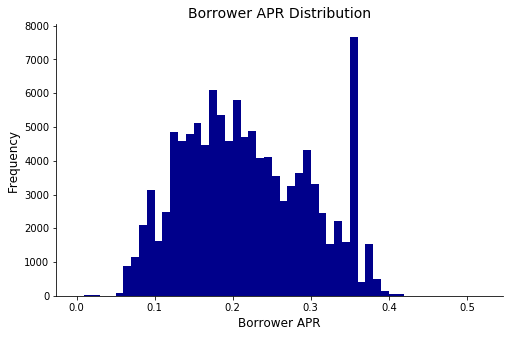

In [3]:
plt.figure(figsize=(8, 5))
bins = np.arange(0, loans.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data=loans, x='BorrowerAPR', bins=bins, color='darkblue');
plt.title('Borrower APR Distribution', fontsize=14)
plt.xlabel('Borrower APR', fontsize=12);
plt.ylabel('Frequency', fontsize=12)
sb.despine()

## Borrower's APR vs LoanAmount

> * There exists a negative relationship between APR and LoanAmount. The more the loan amount is, the lower APR is.

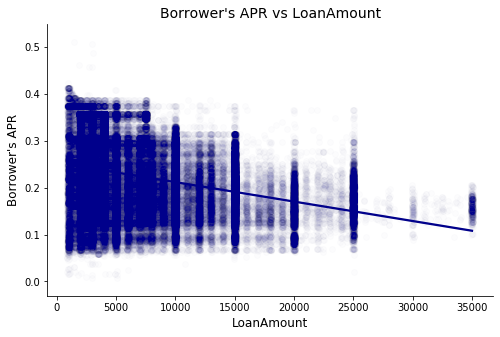

In [10]:
plt.figure(figsize=(8,5))
sb.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerAPR', color='darkblue', x_jitter=100,
          scatter_kws={'alpha':0.01}, fit_reg=True)
plt.title("Borrower's APR vs LoanAmount", fontsize=14)
plt.xlabel('LoanAmount', fontsize=12)
plt.ylabel("Borrower's APR", fontsize=12);
sb.despine()

## Borrower's APR vs Ratings

> * Rating has negative relation with APR, the more the rating is, the less APR is.

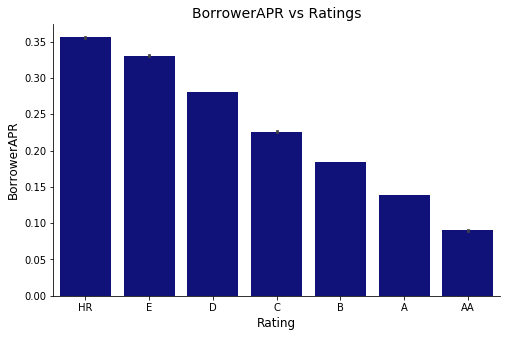

In [5]:
plt.figure(figsize = (8, 5))
sb.barplot(data=loans, x='ProsperRating (Alpha)', y='BorrowerAPR', color='darkblue')
plt.title('BorrowerAPR vs Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('BorrowerAPR', fontsize=12)
sb.despine();

## Borrower's APR vs LoanAmount across Ratings

> * The Negative relation between borrower's APR and loanAmount turns to be slightly positive in high ratings!

<Figure size 864x864 with 0 Axes>

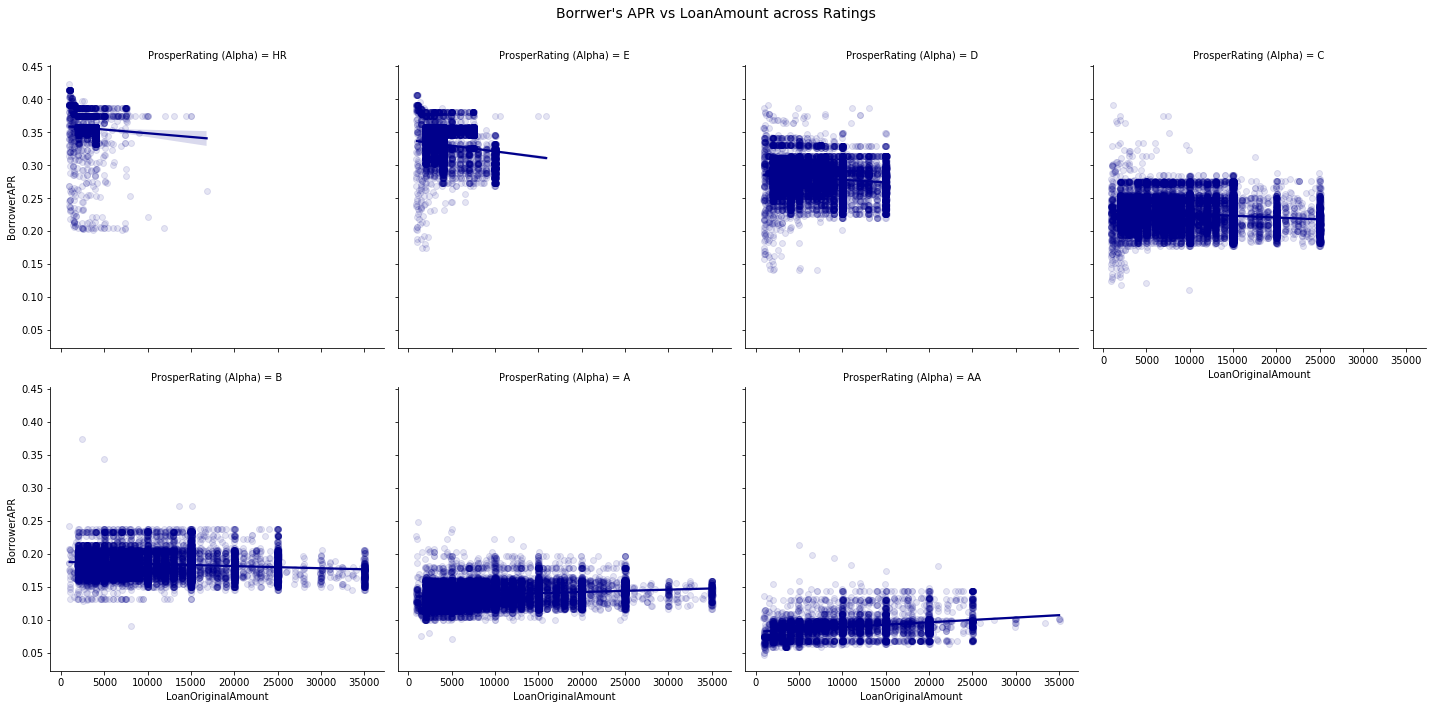

In [9]:
plt.figure(figsize=(12,12))
g=sb.FacetGrid(data=loans, col='ProsperRating (Alpha)', col_wrap=4, height=5, aspect=1)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color='darkblue', x_jitter=100, scatter_kws={'alpha':0.1});
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Borrwer's APR vs LoanAmount across Ratings", fontsize=14);

## Borrower's APR vs Ratings across Terms

> * There is negative relation between borrower's APR and ratings across all terms.

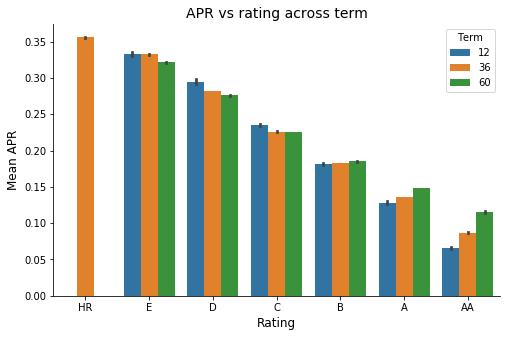

In [20]:
plt.figure(figsize = (8,5))
sb.barplot(data=loans, x='ProsperRating (Alpha)', y='BorrowerAPR', hue = 'Term')
plt.title('APR vs rating across term', fontsize=14)
plt.ylabel('Mean APR', fontsize=12)
plt.xlabel('Rating', fontsize=12)
sb.despine();